In [23]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib import cm


class agent:
    """
    Agent class encapsulates the information about the position and phenotpye of the agent as well as the agent's current birth and relocation rate.

        Parameters:
            h1 to h5 (float): relocation rate or hopping rate of the agent at resource level 1 to 5, which comprises the agent's phenotype
            x, y (int): the x and y coordinate of the agent's location in the 2-dimensional environment
        Functions:
            updatepos(x,y): update the agent's location to (x,y)
    """

    def __init__(self, hop, x, y):

        self.hop = hop
        self.pos = (x, y)
        self.birth = [0, 1, 2, 3, b5]
        # resource goes as 0, 1, 2, 3, 4
        self.b = self.birth[int(resource[x, y])]
        self.h = self.hop[int(resource[x, y])]

    def updatepos(self, x, y):
        self.pos = (x, y)
        # resource goes as 0, 1, 2, 3, 4
        self.b = self.birth[int(resource[x, y])]
        self.h = self.hop[int(resource[x, y])]

# Animation of evolution dynamics
## Violin plots over iterations

/home/tong/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


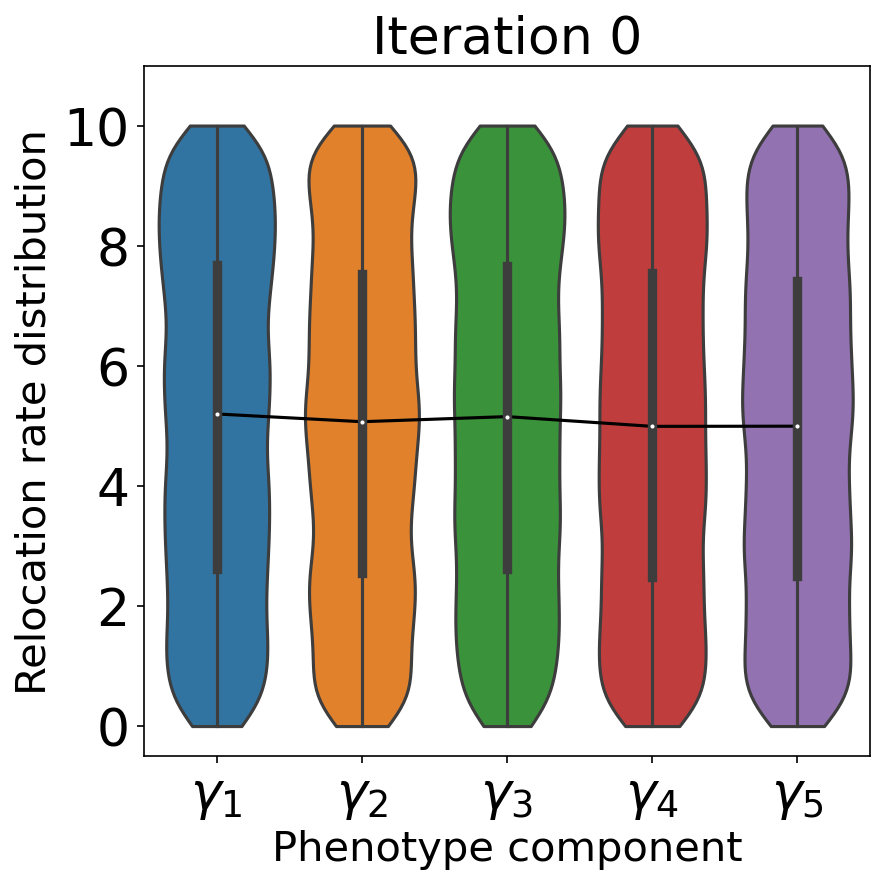

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [9]:
def get_violin_data(iteration):
    data = [[] for _ in range(20)]
    boxdata = []
    for j in range(20):
        try:
            with open("./evolve_data/2021_04_08_21_48/trial_{}/iteration_{}".format(j, iteration), "rb") as fp:   # Unpickling
                data[j] = pickle.load(fp)
        except FileNotFoundError:
            print("trial_{}".format(j) +
                  " doesn\'t have iteration_{}".format(iteration))
        else:
            boxdata.append(np.array([data[j][i].hop for i in range(500)]))
    return pd.DataFrame(np.array(boxdata).reshape(10000, 5), columns=('$\gamma_1$', r'$\gamma_2$', r'$\gamma_3$', r'$\gamma_4$', r'$\gamma_5$'))


color = 'k'
df = get_violin_data("00")
fig = plt.figure(figsize=(6, 6), dpi=150)
ax = plt.subplot(1, 1, 1)
ax.set_ylim(-0.5, 11)
ax.plot(df.median(), color=color, label='Simulated')
sns.violinplot(data=df, scale='area', inner='box', cut=0, ax=ax)
ax.set_title('Iteration {}'.format(0), fontsize=16)
ax.set_xlabel("Phenotype component", fontsize=12)
ax.set_ylabel("Relocation rate distribution", color=color, fontsize=12)


def update(i):
    ax.clear()
    df_new = get_violin_data(i)
    ax.set_xlabel("Phenotype component", fontsize=20)
    ax.set_ylabel("Relocation rate distribution", color=color, fontsize=20)
    ax.plot(df_new.median(), color=color, label='Simulated')
    ax.set_ylim(-0.5, 11)
    sns.violinplot(data=df_new, scale='area', inner='box', cut=0, ax=ax)
    ax.tick_params(axis='y', labelcolor=color, labelsize=25)
    ax.tick_params(axis='x', labelcolor=color, labelsize=25)
    ax.set_title('Iteration {}'.format(i), fontsize=25)
    plt.tight_layout()
    plt.show()


ani = FuncAnimation(fig, update, frames=[_ for _ in range(
    0, 2100, 500)]+[_ for _ in range(2100, 20001, 7000)], interval=200)
HTML(ani.to_html5_video())

## Agent hopping animation on resource map

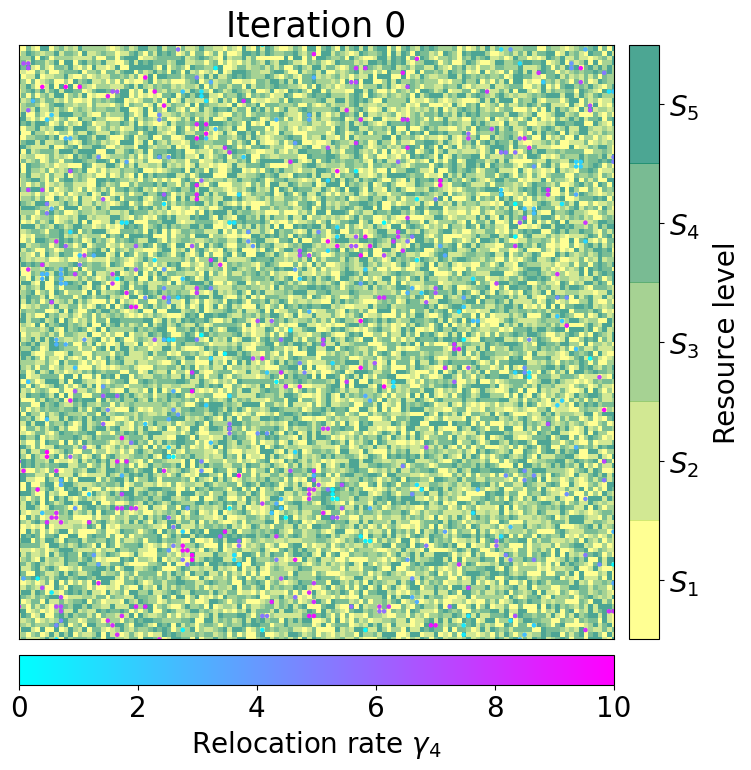

In [12]:
def get_loc_data_single_trial(iteration):  # for 1 trial
    for j in [0]:
        try:
            with open("./evolve_data/2021_04_08_21_48/trial_{}/iteration_{}".format(j, iteration), "rb") as fp:   # Unpickling
                data = pickle.load(fp)
        except FileNotFoundError:
            print("trial_{}".format(j)+" doesn\'t have iteration_{}".format(i))
        else:
            return (np.array([data[i].pos for i in range(500)]), np.array([data[i].hop[-2] for i in range(500)]))


with open('./evolve_data/2021_04_08_14_50/trail_19/resource.txt', "rb") as fp:
    resource = pickle.load(fp)

fig = plt.figure(figsize=(8, 8), dpi=100)

gs = gridspec.GridSpec(2, 2, height_ratios=[1, 0.05], width_ratios=[1, 0.05])
gs.update(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)
ax = plt.subplot(gs[0, 0])
ax.set_xlim(0, 127)
ax.set_ylim(0, 127)
im = ax.imshow(resource, interpolation='none', origin='lower',
               alpha=0.7, cmap=cm.get_cmap('summer_r', 5))

cbax1 = plt.subplot(gs[0, 1])
cbar = fig.colorbar(im, cax=cbax1)
cbar.set_ticks([0, 1, 2, 3, 4])
cbar.set_label('Resource level', fontsize=20, labelpad=10)
cbar.set_ticklabels([r'$S_1$', r'$S_2$', r'$S_3$', r'$S_4$', r'$S_5$'])
plt.yticks(fontsize=20)
im.set_clim(-0.5, 4.5)

loc0, _ = get_loc_data_single_trial(0)
plot = ax.scatter(loc0[:, 0], loc0[:, 1], s=5, c=_, cmap='cool')
cbax2 = plt.subplot(gs[1, 0])
cbar2 = fig.colorbar(plot, cax=cbax2, orientation="horizontal")
cbar2.set_label('Relocation rate $\gamma_4$', fontsize=20)
plt.xticks(fontsize=20)
plot.set_clim(0, 10)
ax.tick_params(
    axis='both',
    which='both',
    bottom=False,
    left=False,
    top=False,
    labelbottom=False,
    labelleft=False)
ax.set_title('Iteration {}'.format(0), fontsize=25)


def update(i):
    loc0, _ = get_loc_data_single_trial(i)
    plot.set_offsets(loc0)
    plot.set_array(_)
    ax.set_title('Iteration {}'.format(i), fontsize=25)
    return plot


ani = FuncAnimation(fig, update, frames=[_ for _ in range(
    0, 2100, 500)]+[_ for _ in range(2100, 20001, 7000)], interval=200)  # +[_ for _ in range(2100,20000,700)]
HTML(ani.to_html5_video())

# ani.save('loc_evolve.gif', dpi=100, writer='imagemagick')
# ani.save('loc_evolve.mov',dpi=200)

## Birth-hopping dynamics within 1 iteration

In [28]:
import copy
import math
import random


def get_num(a, n):
    """
    Efficiently count agent numbers at all the sites

        Parameters: 
            a (list or array): list of agent object;
            n (int): size of the square environment
        Return:
            2-d numpy array: entry at i,j represents the number of agent at location (i,j)
    """
    num = np.zeros((n, n), dtype=int)
    for pos in [a[i].__dict__['pos'] for i in range(len(a))]:
        num[pos] += 1
    return num


def get_i(x, arr, l, r):
    """
    Binary search for the index of an element in a sorted list

        Parameters:
            x (float): target to be located for
            arr (list or numpy array): a sorted list where the target will be located at
            l (int): left pointer, usually start with 0
            r (int): right pointer, usually start with len(a)
        Return:
            i (int): index that arr[i]<=x<=arr[i+1]
    """
    if x <= arr[0]:
        return 0
    else:
        while l <= r:
            mid = l + int((r - l)/2)
            # Check if x is present at mid
            if arr[mid] < x and arr[mid+1] >= x:
                return mid+1
            # If x is greater, ignore left half
            elif arr[mid+1] < x:
                l = mid + 1
            # If x is smaller, ignore right half
            else:
                r = mid
        raise Exception("Target not found")


def initialcondtiongenerator_uniform(hop_high=10, n=128, m=500):
    """Generate a list of agents from uniformly chosen hopping rates and locations; locations are chosen without replacement
    """
    pos = np.array([[i//n, i % n]
                    for i in np.random.choice(n*n, m, replace=False)])
    return [agent(hop, x, y) for hop, x, y in zip(np.random.uniform(0, hop_high, (m, 5)), pos[:, 0], pos[:, 1])]


def evolve_event(total_iteration,  initial_condition, n=128, noisestd=0.01, datastoretype=100,
                 initialagentnumber=500, T=0.3, K=1, hop_high=10, note=None, b5=4, c=0):

    a = copy.deepcopy(initial_condition)
    event = []
    for iteration in range(total_iteration):
        t = 0
        num = get_num(a, n)
        br = [a[i].b for i in range(len(a))]
        hr = [a[i].h for i in range(len(a))]
        brsum = sum(br)
        w = brsum + sum(hr)  # total rates

        br_cumsum = np.cumsum(br)
        hr_cumsum = np.cumsum(hr)
        while t < T:

            dt = -math.log(random.uniform(0.0, 1.0)) / w
            t = t + dt
            r = w * random.uniform(0.0, 1.0)

            if r < brsum:
                 # birth
                i = get_i(r, br_cumsum, 0, len(a)-1)
                hop_advance = [[1, 0], [0, 1], [-1, 0],
                               [0, -1]][np.random.randint(0, 4)]
                pos_new = (np.array(a[i].pos)+np.array(hop_advance)) % n

                if num[pos_new[0], pos_new[1]] < K:

                    noise = np.random.normal(0, noisestd, 5)
                    hop_new = np.clip(np.array(a[i].hop)+noise, 0, hop_high)
                    # record the event
                    event.append(
                        [t, 'b', (pos_new[0], pos_new[1]), hop_new[-2]])

                    a.append(agent(hop_new, pos_new[0], pos_new[1]))
                    num[pos_new[0], pos_new[1]] += 1
                    br.append(a[-1].b)
                    hr.append(a[-1].h)
                    brsum += a[-1].b
                    w += a[-1].b+a[-1].h
                    br_cumsum = np.append(br_cumsum, a[-1].b+br_cumsum[-1])
                    hr_cumsum = np.append(hr_cumsum, a[-1].h+hr_cumsum[-1])

            else:
                # hopping
                i = get_i(r, brsum+hr_cumsum, 0, len(a)-1)

                hop_advance = [[1, 0], [0, 1], [-1, 0],
                               [0, -1]][np.random.randint(0, 4)]
                pos_new = (np.array(a[i].pos)+np.array(hop_advance)) % n

                if num[pos_new[0], pos_new[1]] < K:
                    # record the event
                    event.append([t, 'h', a[i].pos, (pos_new[0], pos_new[1])])
                    num[pos_new[0], pos_new[1]] += 1
                    num[a[i].pos[0], a[i].pos[1]] -= 1
                    a[i].updatepos(pos_new[0], pos_new[1])
                    brsum += a[i].b-br[i]
                    w += a[i].b-br[i]+a[i].h-hr[i]
                    br_cumsum[i:] += a[i].b-br[i]
                    hr_cumsum[i:] += a[i].h-hr[i]
                    br[i] = a[i].b
                    hr[i] = a[i].h

        if len(a) > initialagentnumber:
            #             print(len(a))
            # randomly generate m agents to keep for the next iteration
            reset = random.sample(range(len(a)), initialagentnumber)
            a = [a[i] for i in reset]

    return event


def scatter_update(initial, event, dt, i):
    scatter_pos = [initial[i].pos for i in range(500)]
    scatter_h4 = [initial[i].hop[-2] for i in range(500)]
    t = 0
    j = 0
    t_t = [_[0] for _ in event]
    t_e = [_[1] for _ in event]
    while t < i*dt:
        t = t_t[j]

        if event[j][1] == "b":
            scatter_pos.append(event[j][2])
            scatter_h4.append(event[j][3])
        else:
            scatter_pos[scatter_pos.index(event[j][2])] = event[j][3]
        j += 1
    return (np.array(scatter_pos), np.array(scatter_h4))

In [29]:
b5 = 4
ini = initialcondtiongenerator_uniform(hop_high=10, n=128, m=500)
event = evolve_event(total_iteration=1,  initial_condition=ini, n=128, noisestd=0.05, datastoretype=100,
                     initialagentnumber=500, T=0.3, K=1, hop_high=10, note=None)

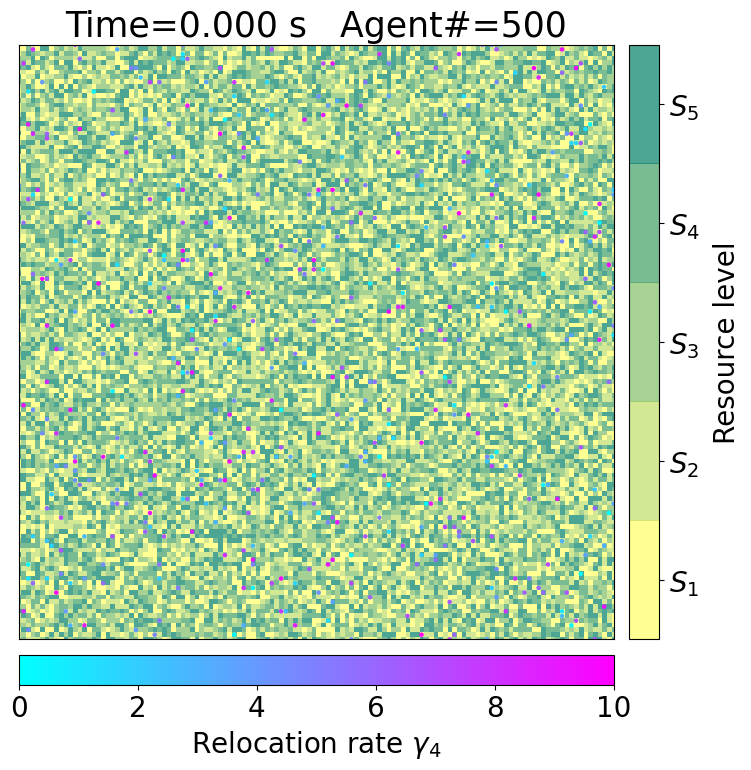

In [37]:
fig = plt.figure(figsize=(8, 8), dpi=100)
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 0.05], width_ratios=[1, 0.05])
gs.update(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)
ax = plt.subplot(gs[0, 0])
ax.set_xlim(0, 127)
ax.set_ylim(0, 127)
im = ax.imshow(resource, interpolation='none', origin='lower',
               alpha=0.7, cmap=cm.get_cmap('summer_r', 5))

cbax1 = plt.subplot(gs[0, 1])
cbar = fig.colorbar(im, cax=cbax1)

cbar.set_ticks([0, 1, 2, 3, 4])
cbar.set_label('Resource level', fontsize=20, labelpad=10)
cbar.set_ticklabels([r'$S_1$', r'$S_2$', r'$S_3$', r'$S_4$', r'$S_5$'])
plt.yticks(fontsize=20)
im.set_clim(-0.5, 4.5)

loc0, _ = scatter_update(ini, event, 0.003, 0)
plot = ax.scatter(loc0[:, 0], loc0[:, 1], s=5, c=_, cmap='cool')
cbax2 = plt.subplot(gs[1, 0])

cbar2 = fig.colorbar(plot, cax=cbax2, orientation="horizontal")
cbar2.set_label('Relocation rate $\gamma_4$', fontsize=20)
plt.xticks(fontsize=20)
plot.set_clim(0, 10)
ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,
    left=False,  # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft=False)  # labels along the bottom edge are off
ax.set_title('Iteration {}'.format(0), fontsize=25)


def update(i):
    loc0, _ = scatter_update(ini, event, 0.003, i)
    plot.set_offsets(loc0)
    plot.set_array(_)
    ax.set_title('Time={:.3f} s   Agent#={}'.format(
        0.003*i, loc0.shape[0]), fontsize=25)
    return plot


# +[_ for _ in range(2100,20000,700)]
ani = FuncAnimation(fig, update, frames=101, interval=100)
HTML(ani.to_html5_video())

# ani.save('dynamics.gif', dpi=100, writer='imagemagick')
# ani.save('dynamics.mov',dpi=200)